In [33]:
#Import statments
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
# display sample from Dataset
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


# Data Cleaning

In [5]:
# drop some non- effective columns
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','CLIENTNUM'], axis=1, inplace=True)

In [6]:
df.info()
# No Nulls
# Some records have "Unknown" as the marital status

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
# the number of Unknown value in Marital_status
len(df.loc[df['Marital_Status']=="Unknown"])

749

In [8]:
# check the numer of female & male in Dataset
df.Gender.value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [9]:
# the number of Unknown value in Education_level
len(df.loc[df['Education_Level']=="Unknown"])

1519

In [10]:
df.duplicated().sum()
# No Duplicates

0

In [11]:
# dataset describe 
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [12]:
# describe the male & female Data
df_males = df.loc[df['Gender']=="M"]
df_females = df.loc[df['Gender']=="F"]
df_males.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000,4769.000000
mean,46.178863,2.352485,35.871462,3.817782,2.329209,2.502202,12685.674963,1188.433215,11497.241749,0.766147,4493.706228,63.180541,0.710759,0.199548
std,8.092902,1.290166,8.066578,1.562233,0.990214,1.115990,10647.936985,803.594667,10665.105660,0.238023,3835.315345,25.101311,0.253138,0.232450
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,15.000000,0.000000,530.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,3805.000000,582.000000,2615.000000,0.627000,1881.000000,42.000000,0.571000,0.027000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,3.000000,8902.000000,1314.000000,7656.000000,0.739000,3513.000000,64.000000,0.692000,0.100000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,19040.000000,1786.000000,17922.000000,0.866000,4711.000000,79.000000,0.812000,0.297000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.571000,0.994000


In [13]:
df_females.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000,5358.000000
mean,46.456887,2.340612,35.979097,3.807951,2.351810,2.413587,5023.854274,1140.011198,3883.843076,0.754417,4324.318216,66.352370,0.713525,0.341957
std,7.946944,1.306735,7.914793,1.547541,1.028422,1.095879,5251.881090,824.400679,5260.279756,0.200844,2951.002887,21.815365,0.223855,0.293300
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,12.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2160.000000,0.000000,935.250000,0.635000,2424.250000,48.000000,0.591000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,3048.000000,1247.000000,1797.500000,0.735000,4134.000000,70.000000,0.710000,0.304000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,5638.500000,1782.000000,4605.000000,0.853000,4751.750000,81.000000,0.822000,0.602000
max,67.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.368000,17437.000000,138.000000,3.714000,0.999000


In [14]:
# check the relation between Gender & Income 
df_males.Income_Category.value_counts()

$80K - $120K      1535
$60K - $80K       1402
$40K - $60K        776
$120K +            727
Less than $40K     277
Unknown             52
Name: Income_Category, dtype: int64

In [15]:
df_females.Income_Category.value_counts()

Less than $40K    3284
Unknown           1060
$40K - $60K       1014
Name: Income_Category, dtype: int64

# Q1 Trends that differ between Males and Females

In [16]:
print(df_males.Credit_Limit.mean(),df_females.Credit_Limit.mean(),df.Credit_Limit.mean())

12685.674963304655 5023.8542739828745 8631.953698034848


# Q2 Trends that differ between Married and Single Clients

In [17]:
df.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [18]:
df_Marital_Status = df.loc[df['Marital_Status']!="Unknown"].copy()
df_married = df.loc[df['Marital_Status']=="Married"]
df_divorced = df.loc[df['Marital_Status']=="Divorced"]
df_single = df.loc[df['Marital_Status']=="Single"]

df.Marital_Status.value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64

In [19]:
df_married.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000
mean,46.735012,2.366332,36.213996,3.841050,2.333476,2.457222,8076.661895,1197.163644,6879.498250,0.772312,4173.417965,61.725411,0.715721,0.289650
std,7.754735,1.287188,7.774379,1.539256,1.022556,1.104561,8594.071600,810.264662,8590.924199,0.245198,3450.782565,24.717575,0.258703,0.278474
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,14.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,32.000000,3.000000,2.000000,2.000000,2538.000000,604.500000,1224.000000,0.628500,1847.000000,40.000000,0.577000,0.034000
50%,47.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4234.000000,1308.000000,3198.000000,0.741000,3561.000000,63.000000,0.700000,0.199000
75%,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,9985.000000,1813.000000,8843.500000,0.872000,4681.500000,79.000000,0.822000,0.523000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,2.675000,18484.000000,139.000000,3.571000,0.994000


In [20]:
df_divorced.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.00000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,45.116310,2.377005,35.145722,3.863636,2.347594,2.42246,9358.565107,1155.981283,8202.583824,0.755584,4529.090909,66.925134,0.702525,0.256947
std,7.557976,1.283029,7.451505,1.531504,1.017666,1.10766,9503.592659,817.656415,9488.229922,0.197658,3419.564644,22.420940,0.209205,0.265511
min,26.000000,0.000000,13.000000,1.000000,1.000000,0.00000,1438.300000,0.000000,10.000000,0.000000,781.000000,20.000000,0.000000,0.000000
25%,41.000000,2.000000,31.000000,3.000000,2.000000,2.00000,2672.000000,189.250000,1438.300000,0.641000,2393.250000,49.750000,0.586500,0.011750
50%,45.000000,2.000000,36.000000,4.000000,2.000000,2.00000,5119.500000,1281.000000,3990.500000,0.740500,3883.000000,69.000000,0.695000,0.156500
75%,49.000000,3.000000,39.000000,5.000000,3.000000,3.00000,12307.750000,1782.500000,11199.000000,0.859000,4738.000000,81.000000,0.812500,0.464000
max,65.000000,5.000000,56.000000,6.000000,6.000000,6.00000,34516.000000,2517.000000,34516.000000,2.368000,17038.000000,127.000000,2.000000,0.995000


In [21]:
df_single.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000,3943.000000
mean,46.213036,2.279990,35.877758,3.778849,2.352523,2.466396,8999.684758,1124.241441,7875.443317,0.748048,4594.554400,67.756531,0.709308,0.264366
std,8.558259,1.317726,8.442979,1.562267,0.989544,1.115740,9445.464804,816.560346,9447.146604,0.193112,3328.604836,21.806912,0.219773,0.274977
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,530.000000,10.000000,0.000000,0.000000
25%,40.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2536.000000,0.000000,1371.000000,0.630000,2508.500000,53.000000,0.588000,0.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4712.000000,1235.000000,3687.000000,0.733000,4039.000000,70.000000,0.703000,0.156000
75%,52.000000,3.000000,41.000000,5.000000,3.000000,3.000000,11663.500000,1741.000000,10503.500000,0.846000,4777.500000,81.000000,0.818000,0.488000
max,65.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,17744.000000,134.000000,3.714000,0.999000


# Q3 Is there a relationship between the number of dependents and the credit limt?


2.3462032191172115


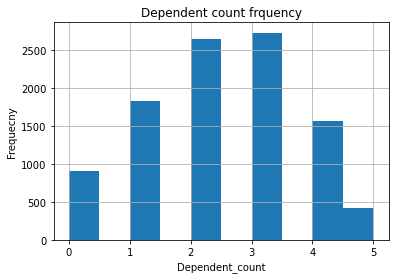

In [30]:
# check the Dependent counts
df.Dependent_count.hist();
plt.title('Dependent count frquency');
plt.xlabel('Dependent_count');
plt.ylabel('Frequecny');
print(df.Dependent_count.mean());

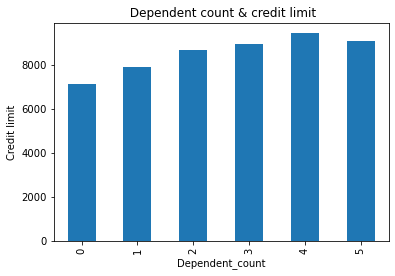

In [34]:
# Dispaly Dependent count with credit limit
df.groupby('Dependent_count').mean()['Credit_Limit'].plot(kind='bar');
plt.title(' Dependent count & credit limit');
plt.xlabel('Dependent_count');
plt.ylabel('Credit limit');

In [24]:
#check Card_category
df.Card_Category.value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

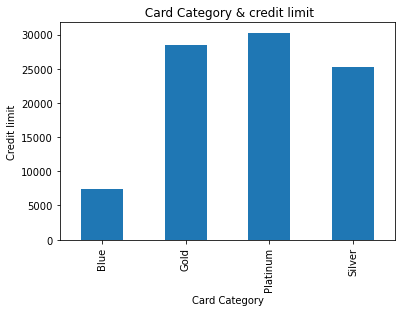

In [35]:
# relation between the card category & credit limit
df.groupby('Card_Category').mean()['Credit_Limit'].plot(kind='bar');
plt.title(' Card Category & credit limit');
plt.xlabel('Card Category');
plt.ylabel('Credit limit');

In [26]:
# chechk the proportion of blue card Category
len(df.loc[df['Card_Category']=="Blue"])/len(df)
# the main of people in blue category.

0.931766564629209

In [27]:
Mohamed Hegazy
Mostafa Mahmoud
Mohamed Anbar

SyntaxError: invalid syntax (<ipython-input-27-f72f6c5469f4>, line 1)